# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot

In [2]:
df = pd.read_excel("C:/Users/AGOY/Tugas Akhir 14117099 Mobile Legends/Mobile Legends Professional League.xlsx")

# Show Data

In [3]:
df_data = pd.read_excel("C:/Users/AGOY/Tugas Akhir 14117099 Mobile Legends/Mobile Legends Professional League.xlsx")
df_match = pd.read_excel("C:/Users/AGOY/Tugas Akhir 14117099 Mobile Legends/Mobile Legends Professional League.xlsx", sheet_name="Match")
df_hero = pd.read_excel("C:/Users/AGOY/Tugas Akhir 14117099 Mobile Legends/Mobile Legends Professional League.xlsx", sheet_name="Hero")
df_team = pd.read_excel("C:/Users/AGOY/Tugas Akhir 14117099 Mobile Legends/Mobile Legends Professional League.xlsx", sheet_name="Team")
df_data = df_match

print(f"Shape Match Dataset: {df_match.shape}")
display(df_match.head())
print(f"Shape Hero Dataset: {df_hero.shape}")
display(df_hero.head())
print(f"Shape Team Dataset: {df_team.shape}")
display(df_team.head())

Shape Match Dataset: (442, 28)


,date,game,blue,red,time(minutes),win,win_team,mvp,pick_blue_1,pick_blue_2,...,pick_red_1,pick_red_2,pick_red_3,pick_red_4,pick_red_5,ban_red_1,ban_red_2,ban_red_3,ban_red_4,ban_red_5
0,2023-01-01,1,BLCK,INC,12.37,BLCK,blue,valentina,benedetta,valentina,...,yu_zhong,guinevere,lunox,beatrix,atlas,pharsa,wan_wan,gloo,diggie,estes
1,2023-01-01,2,MVG,MDH,16.03,MVG,blue,karrie,gloo,fredrinn,...,lapu_lapu,ling,faramis,claude,chou,kaja,wan_wan,hayabusa,beatrix,brody
2,2023-01-01,3,INC,FCON,14.28,INC,blue,fredrinn,khaleed,fredrinn,...,joy,ling,faramis,irithel,lolita,gloo,kaja,grock,lunox,yve
3,2023-01-01,4,TDK,MVG,11.46,TDK,blue,popol_kupa,lapu_lapu,hayabusa,...,uranus,fredrinn,pharsa,karrie,chou,gloo,fanny,joy,beatrix,brody
4,2023-01-01,5,FCON,BURN,20.21,FCON,blue,harith,fredrinn,fanny,...,lapu_lapu,ling,faramis,harith,grock,gloo,kaja,grock,lunox,yve


Shape Hero Dataset: (119, 8)


,hero,total_pick,total_pick_blue,total_ban_blue,total_pick_red,total_ban_red,total_ban,total_pick_ban
0,aamon,5,1,2,4,1,3,8
1,akai,83,48,52,35,38,90,173
2,aldous,2,2,1,0,0,1,3
3,alice,14,5,3,9,3,6,20
4,alpha,0,0,0,0,0,0,0


Shape Team Dataset: (22, 6)


,team,win_rate,avg_kda,avg_game_time,first_blood_rate,hero_pool
0,ECHO,0.720,6.6,00:16:16,0.480,37
1,RRQ,0.609,5.2,00:18:31,0.609,37
2,TV,0.600,6.9,00:16:41,0.600,29
3,FCON,0.550,5.9,00:16:41,0.850,32
4,INC,0.533,5.2,00:16:11,0.267,31


## Check Missing Value

In [4]:
#mengecek data apakah masih ada yang kosong
df_data.isnull().sum().to_frame('NaN value').T

,date,game,blue,red,time(minutes),win,win_team,mvp,pick_blue_1,pick_blue_2,...,pick_red_1,pick_red_2,pick_red_3,pick_red_4,pick_red_5,ban_red_1,ban_red_2,ban_red_3,ban_red_4,ban_red_5
NaN value,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Check Duplikat Data

In [5]:
#print(df_data.duplicated().sum())
duplicates = df_data.duplicated()
df_data_rows = df_data[duplicates]
print("Duplicate Baris:")
print(df_data_rows)

Duplicate Baris:
Empty DataFrame
Columns: [date, game, blue, red, time(minutes), win, win_team, mvp, pick_blue_1, pick_blue_2, pick_blue_3, pick_blue_4, pick_blue_5, ban_blue_1, ban_blue_2, ban_blue_3, ban_blue_4, ban_blue_5, pick_red_1, pick_red_2, pick_red_3, pick_red_4, pick_red_5, ban_red_1, ban_red_2, ban_red_3, ban_red_4, ban_red_5]
Index: []

[0 rows x 28 columns]


# Preprocessing Data

## Label Encoder

### Binary-label

In [6]:
print('Red Team',df_data['red'].unique(),'\n')
#df_data['win'].unique()
print('Blue Team',df_data['blue'].unique())

Red Team ['INC' 'MDH' 'FCON' 'MVG' 'BURN' 'TDK' 'OT' 'S11' 'TV' 'RRQ' 'RRQA' 'ONIC'
 'BLCK' 'ECHO' 'THQ' 'RSG' 'NXPE' 'TNC' 'BREN' 'ONIC_PH' 'RSG_PH' 'OMG'
 'AURA' 'RBL' 'BTR' 'GEEK' 'EVOS' 'AE'] 

Blue Team ['BLCK' 'MVG' 'INC' 'TDK' 'FCON' 'ONIC' 'RSG' 'TV' 'RRQ' 'RRQA' 'ECHO'
 'THQ' 'MDH' 'BURN' 'OT' 'S11' 'TNC' 'NXPE' 'BREN' 'OMG' 'RSG_PH'
 'ONIC_PH' 'RBL' 'AURA' 'AE' 'GEEK' 'EVOS' 'BTR']


In [7]:
## buat label baru dengan menggunakan index array yang muncul pada win dan mvp dari kolom/data sumbernya
print(df_data['win_team'].unique())
data = df_data
#for i in df_data['win_team']:
#  if df_data['blue'] in i == df_data['win_team']:
#    df_data['win_team'] = '0'
#  else:
#    df_data['win_team'] = '1'

red ='INC','MDH','FCON','MVG','BURN','TDK','OT','S11','TV','RRQ','RRQA','ONIC','BLCK','ECHO','THQ','RSG','NXPE','TNC','BREN','ONIC_PH','RSG_PH','OMG','AURA','RBL','BTR','GEEK','EVOS','AE'
blue ='BLCK','MVG','INC','TDK','FCON','ONIC','RSG','TV','RRQ','RRQA','ECHO','THQ','MDH','BURN','OT','S11','TNC','NXPE','BREN','OMG','RSG_PH','ONIC_PH','RBL','AURA','AE','GEEK','EVOS','BTR'

df_data['win_team'] = np.where(df_data['blue'] == df_data['win'], 0,1)
#df_data['red'] = np.where(df_data['win_team'] == df_data['red'],1,0)

['blue' 'red']


### Multi-label

In [8]:
# Numbering Match Team
from sklearn import preprocessing

le_hero = preprocessing.LabelEncoder()
le_team = preprocessing.LabelEncoder()

#hero
hero_enc = le_hero.fit(df_hero['hero'])
df_data = df_match.copy()

#team
team_enc = le_team.fit(df_team['team'])
df_data = df_match.copy()

## MVP
df_data['mvp'] = le_hero.transform(df_data['mvp'])

#team
#df_data['blue'] = le_team.transform(df_data['blue'])
#df_data['red'] = le_team.transform(df_data['red'])
# df_data['win'] = le_team.transform(df_data['win'])

#Blue Team
df_data['pick_blue_1'] = le_hero.transform(df_data['pick_blue_1'])
df_data['pick_blue_2'] = le_hero.transform(df_data['pick_blue_2'])
df_data['pick_blue_3'] = le_hero.transform(df_data['pick_blue_3'])
df_data['pick_blue_4'] = le_hero.transform(df_data['pick_blue_4'])
df_data['pick_blue_5'] = le_hero.transform(df_data['pick_blue_5'])

#Red Team
df_data['pick_red_1'] = le_hero.transform(df_data['pick_red_1'])
df_data['pick_red_2'] = le_hero.transform(df_data['pick_red_2'])
df_data['pick_red_3'] = le_hero.transform(df_data['pick_red_3'])
df_data['pick_red_4'] = le_hero.transform(df_data['pick_red_4'])
df_data['pick_red_5'] = le_hero.transform(df_data['pick_red_5'])


df_data

,date,game,blue,red,time(minutes),win,win_team,mvp,pick_blue_1,pick_blue_2,...,pick_red_1,pick_red_2,pick_red_3,pick_red_4,pick_red_5,ban_red_1,ban_red_2,ban_red_3,ban_red_4,ban_red_5
0,2023-01-01,1,BLCK,INC,12.37,BLCK,0,107,19,107,...,115,46,76,17,9,pharsa,wan_wan,gloo,diggie,estes
1,2023-01-01,2,MVG,MDH,16.03,MVG,0,65,42,39,...,70,74,36,26,25,kaja,wan_wan,hayabusa,beatrix,brody
2,2023-01-01,3,INC,FCON,14.28,INC,0,39,66,39,...,59,74,36,56,75,gloo,kaja,grock,lunox,yve
3,2023-01-01,4,TDK,MVG,11.46,TDK,0,94,70,52,...,105,39,92,65,25,gloo,fanny,joy,beatrix,brody
4,2023-01-01,5,FCON,BURN,20.21,FCON,0,50,39,35,...,70,74,36,50,45,gloo,kaja,grock,lunox,yve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2023-04-09,438,EVOS,ONIC,12.40,ONIC,1,107,70,69,...,42,35,107,110,63,claude,faramis,minsitthar,franco,diggie
438,2023-04-09,439,ONIC,EVOS,14.47,ONIC,0,61,42,69,...,70,79,92,86,29,joy,fredrinn,wan_wan,hayabusa,fanny
439,2023-04-09,440,ONIC,EVOS,13.52,ONIC,0,107,8,45,...,70,79,92,17,63,joy,fredrinn,wan_wan,kufra,ruby
440,2023-04-09,441,EVOS,ONIC,15.17,ONIC,1,92,8,69,...,39,52,92,50,25,claude,faramis,minsitthar,atlas,kaja


### Check List Labelling

In [9]:
le_name_mapping_hero = dict(zip(le_hero.classes_, le_hero.transform(le_hero.classes_)))
le_name_mapping_team = dict(zip(le_team.classes_, le_team.transform(le_team.classes_)))

#print(f"Shape Match Dataset: {df_match.shape}")
print(f"List nama Hero: {le_name_mapping_hero}")
print(f"List nama Team: {le_name_mapping_team}")

List nama Hero: {'aamon': 0, 'akai': 1, 'aldous': 2, 'alice': 3, 'alpha': 4, 'alucard': 5, 'angela': 6, 'argus': 7, 'arlott': 8, 'atlas': 9, 'aulus': 10, 'aurora': 11, 'badang': 12, 'balmond': 13, 'bane': 14, 'barats': 15, 'baxia': 16, 'beatrix': 17, 'belerick': 18, 'benedetta': 19, 'brody': 20, 'bruno': 21, 'carmilla': 22, 'cecilion': 23, 'change': 24, 'chou': 25, 'claude': 26, 'clint': 27, 'cyclops': 28, 'diggie': 29, 'dyrroth': 30, 'edith': 31, 'esmeralda': 32, 'estes': 33, 'eudora': 34, 'fanny': 35, 'faramis': 36, 'floryn': 37, 'franco': 38, 'fredrinn': 39, 'freya': 40, 'gatotkaca': 41, 'gloo': 42, 'gord': 43, 'granger': 44, 'grock': 45, 'guinevere': 46, 'gusion': 47, 'hanabi': 48, 'hanzo': 49, 'harith': 50, 'harley': 51, 'hayabusa': 52, 'helcurt': 53, 'hilda': 54, 'hylos': 55, 'irithel': 56, 'jawhead': 57, 'johnson': 58, 'joy': 59, 'julian': 60, 'kadita': 61, 'kagura': 62, 'kaja': 63, 'karina': 64, 'karrie': 65, 'khaleed': 66, 'kimmy': 67, 'kufra': 68, 'lancelot': 69, 'lapu_lapu':

## Drop Columns

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           442 non-null    datetime64[ns]
 1   game           442 non-null    int64         
 2   blue           442 non-null    object        
 3   red            442 non-null    object        
 4   time(minutes)  442 non-null    float64       
 5   win            442 non-null    object        
 6   win_team       442 non-null    int32         
 7   mvp            442 non-null    int32         
 8   pick_blue_1    442 non-null    int32         
 9   pick_blue_2    442 non-null    int32         
 10  pick_blue_3    442 non-null    int32         
 11  pick_blue_4    442 non-null    int32         
 12  pick_blue_5    442 non-null    int32         
 13  ban_blue_1     442 non-null    object        
 14  ban_blue_2     442 non-null    object        
 15  ban_blue_3     442 non-

In [11]:
'''
### exclude column yang tidak penting :
date, time, game, mvp
'ban_blue_1', 'ban_blue_2', 'ban_blue_3', 'ban_blue_4', 'ban_blue_5',
'ban_red_1', 'ban_red_2', 'ban_red_3', 'ban_red_4', 'ban_red_5',avg_win_rate_team_bl\
'''
#df_data.drop(['avg_win_rate_team_blue','avg_win_rate_hero_blue','avg_win_rate_team_red', 'avg_win_rate_hero_red'],axis=1,inplace=True)
df_data.drop(['blue','red','date', 'time(minutes)', 'win','game','mvp',
            'ban_blue_1', 'ban_blue_2', 'ban_blue_3',
            'ban_blue_4', 'ban_blue_5', 'ban_red_1',
            'ban_red_2', 'ban_red_3', 'ban_red_4', 'ban_red_5'],
            axis=1,
            inplace=True)

display(df_data)
df_data.info()

,win_team,pick_blue_1,pick_blue_2,pick_blue_3,pick_blue_4,pick_blue_5,pick_red_1,pick_red_2,pick_red_3,pick_red_4,pick_red_5
0,0,19,107,61,65,63,115,46,76,17,9
1,0,42,39,116,65,75,70,74,36,26,25
2,0,66,39,92,110,33,59,74,36,56,75
3,0,70,52,107,94,63,105,39,92,65,25
4,0,39,35,116,65,81,70,74,36,50,45
...,...,...,...,...,...,...,...,...,...,...,...
437,1,70,69,92,17,75,42,35,107,110,63
438,0,42,69,61,82,54,70,79,92,86,29
439,0,8,45,107,82,61,70,79,92,17,63
440,1,8,69,107,17,45,39,52,92,50,25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   win_team     442 non-null    int32
 1   pick_blue_1  442 non-null    int32
 2   pick_blue_2  442 non-null    int32
 3   pick_blue_3  442 non-null    int32
 4   pick_blue_4  442 non-null    int32
 5   pick_blue_5  442 non-null    int32
 6   pick_red_1   442 non-null    int32
 7   pick_red_2   442 non-null    int32
 8   pick_red_3   442 non-null    int32
 9   pick_red_4   442 non-null    int32
 10  pick_red_5   442 non-null    int32
dtypes: int32(11)
memory usage: 19.1 KB


# Data Correlation

<AxesSubplot:>

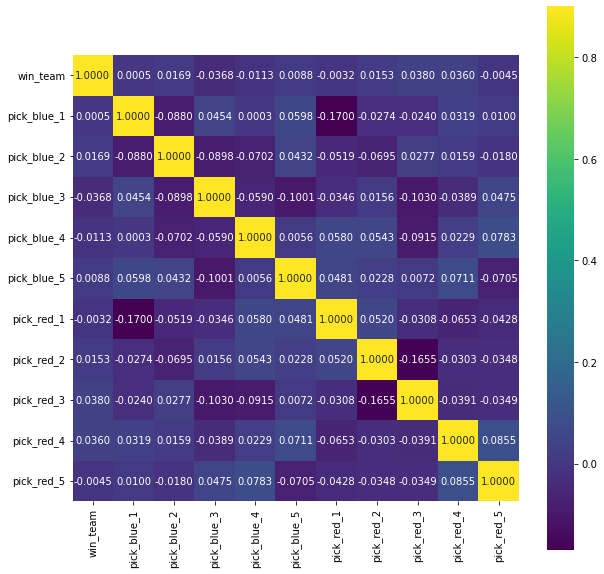

In [12]:
PearsonCorr = df_data.corr(method="pearson")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(PearsonCorr, vmax=.9, square=True,cmap="viridis",annot_kws={"size":10},annot=True, fmt=".4f")

<AxesSubplot:>

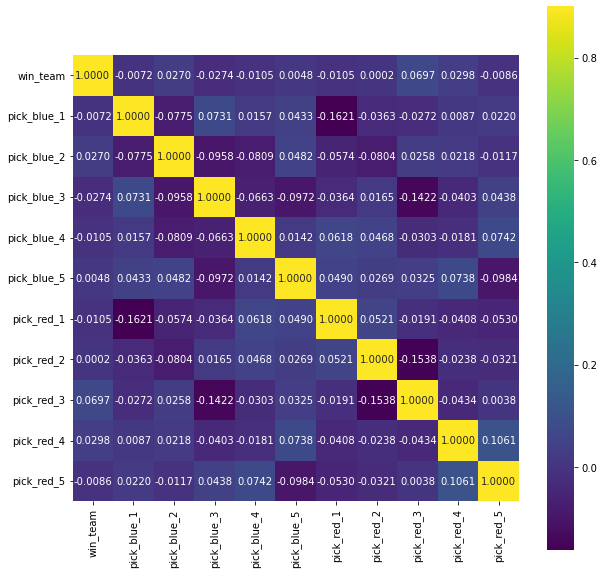

In [13]:
PearsonCorr = df_data.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(PearsonCorr, vmax=.9, square=True,cmap="viridis",annot_kws={"size":10},annot=True, fmt=".4f")

<AxesSubplot:>

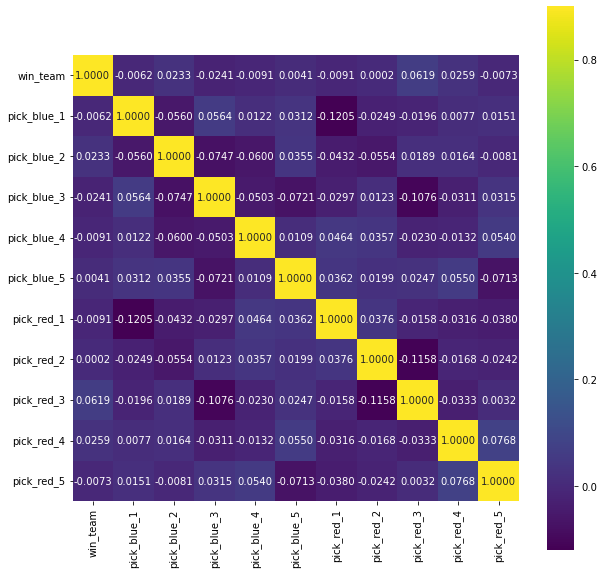

In [14]:
PearsonCorr = df_data.corr(method="kendall")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(PearsonCorr, vmax=.9, square=True,cmap="viridis",annot_kws={"size":10},annot=True, fmt=".4f")

## Balancing Data

win_team
0    229
1    213
Name: win_team, dtype: int64


<AxesSubplot:xlabel='win_team', ylabel='count'>

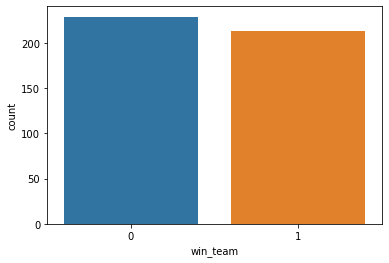

In [15]:
#cek banyak data di kedua komposisi tim baik(0) biru atau merah(1)
print(df_data.groupby(['win_team'])["win_team"].count())
sns.countplot(x=df_data["win_team"])

win_team
0    213
1    213
Name: win_team, dtype: int64


<AxesSubplot:xlabel='win_team', ylabel='count'>

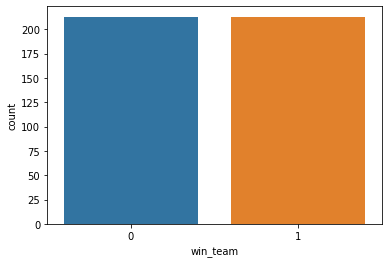

In [16]:
  n_red = (df_data['win_team'] == 1).sum()
n_blue = (df_data['win_team'] == 0).sum()

if n_blue - n_red >= 0:
    win_blue = True
else:
    win_blue = False

if win_blue:
    num_rows_to_drop = min(n_blue - n_red, (df_data['win_team'] == 1).sum())
    rows_to_drop = df_data[df_data['win_team'] == 0].sample(num_rows_to_drop).index
else:
    num_rows_to_drop = min(n_red - n_blue, (df_data['win_team'] == 0).sum())
    rows_to_drop = df_data[df_data['win_team'] == 1].sample(num_rows_to_drop).index

df_data = df_data.drop(rows_to_drop)
print(df_data.groupby(['win_team'])["win_team"].count())
sns.countplot(x=df_data["win_team"])

### Memisahkan data dependen dan idependen

In [17]:
#df_data.pop("win","mvp")
df_temp = df_data.copy()
df_temp

,win_team,pick_blue_1,pick_blue_2,pick_blue_3,pick_blue_4,pick_blue_5,pick_red_1,pick_red_2,pick_red_3,pick_red_4,pick_red_5
0,0,19,107,61,65,63,115,46,76,17,9
1,0,42,39,116,65,75,70,74,36,26,25
2,0,66,39,92,110,33,59,74,36,56,75
3,0,70,52,107,94,63,105,39,92,65,25
4,0,39,35,116,65,81,70,74,36,50,45
...,...,...,...,...,...,...,...,...,...,...,...
437,1,70,69,92,17,75,42,35,107,110,63
438,0,42,69,61,82,54,70,79,92,86,29
439,0,8,45,107,82,61,70,79,92,17,63
440,1,8,69,107,17,45,39,52,92,50,25


In [18]:
#Variabel independen untuk memprediksi atau menjelaskan variabel lain.
#Variabel dependen adalah variabel yang ingin diprediksi atau dijelaskan oleh variabel independen.
'''
###
drop data target Y : kolom win dan mvp
drop data target X : kolom selain win dan mvp
'''

df_temp = df_data.copy()

X = df_temp.drop(['win_team'], axis=1)
Y = df_temp[['win_team']]

# Menampilkan hasil pemisahan variabel
print('Variabel independen:')
print(X.head())

print('\nVariabel dependen:')
print(Y.head())

Variabel independen:
   pick_blue_1  pick_blue_2  pick_blue_3  pick_blue_4  pick_blue_5  \
0           19          107           61           65           63   
1           42           39          116           65           75   
2           66           39           92          110           33   
3           70           52          107           94           63   
4           39           35          116           65           81   

   pick_red_1  pick_red_2  pick_red_3  pick_red_4  pick_red_5  
0         115          46          76          17           9  
1          70          74          36          26          25  
2          59          74          36          56          75  
3         105          39          92          65          25  
4          70          74          36          50          45  

Variabel dependen:
   win_team
0         0
1         0
2         0
3         0
4         0


## Splitting Data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [20]:
data_train = pd.concat([X_train,Y_train],axis=1)
data_test = pd.concat([X_test,Y_test],axis=1)
data_train.to_csv('train.csv',index=False)
data_test.to_csv('test.csv',index=False)
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
# X_train = data_train.drop(-1)
# Y_train = data_train.loc(0:-1)
data_train

,pick_blue_1,pick_blue_2,pick_blue_3,pick_blue_4,pick_blue_5,pick_red_1,pick_red_2,pick_red_3,pick_red_4,pick_red_5,win_team
0,80,69,116,20,36,8,1,107,17,9,1
1,70,60,61,82,63,42,69,107,17,25,1
2,8,79,36,82,45,103,69,107,26,63,1
3,39,74,92,17,97,91,64,116,26,63,1
4,19,1,107,82,75,115,39,111,65,97,0
...,...,...,...,...,...,...,...,...,...,...,...
335,45,1,92,65,25,115,44,116,50,68,1
336,8,35,36,107,45,31,52,61,110,54,0
337,19,39,107,17,33,31,76,36,26,25,1
338,30,74,61,110,54,45,1,116,56,75,1


In [21]:
# data_train = pd.concat([X_train,Y_train],axis=1)
# data_test = pd.concat([X_test,Y_test],axis=1)
data_train.to_csv('train.csv',index=False)
data_test.to_csv('test.csv',index=False)
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
# X_train = data_train.drop(-1)
# Y_train = data_train.loc(0:-1)
data_train

,pick_blue_1,pick_blue_2,pick_blue_3,pick_blue_4,pick_blue_5,pick_red_1,pick_red_2,pick_red_3,pick_red_4,pick_red_5,win_team
0,80,69,116,20,36,8,1,107,17,9,1
1,70,60,61,82,63,42,69,107,17,25,1
2,8,79,36,82,45,103,69,107,26,63,1
3,39,74,92,17,97,91,64,116,26,63,1
4,19,1,107,82,75,115,39,111,65,97,0
...,...,...,...,...,...,...,...,...,...,...,...
335,45,1,92,65,25,115,44,116,50,68,1
336,8,35,36,107,45,31,52,61,110,54,0
337,19,39,107,17,33,31,76,36,26,25,1
338,30,74,61,110,54,45,1,116,56,75,1


WIN train win_team
0    170
1    170
Name: win_team, dtype: int64


<AxesSubplot:xlabel='win_team', ylabel='count'>

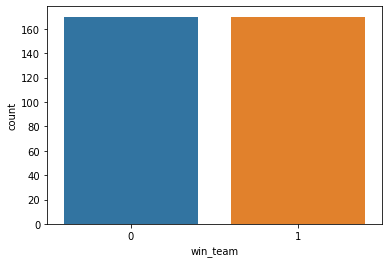

In [22]:
print("WIN train", Y_train.groupby(['win_team'])["win_team"].count())
display(sns.countplot(x=Y_train["win_team"]))


WIN test win_team
0    43
1    43
Name: win_team, dtype: int64


<AxesSubplot:xlabel='win_team', ylabel='count'>

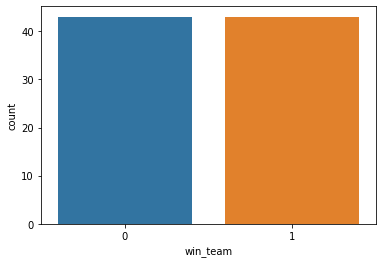

In [23]:
print("\nWIN test",Y_test.groupby(['win_team'])["win_team"].count())
display(sns.countplot(x=Y_test["win_team"]))

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           442 non-null    datetime64[ns]
 1   game           442 non-null    int64         
 2   blue           442 non-null    object        
 3   red            442 non-null    object        
 4   time(minutes)  442 non-null    float64       
 5   win            442 non-null    object        
 6   win_team       442 non-null    object        
 7   mvp            442 non-null    object        
 8   pick_blue_1    442 non-null    object        
 9   pick_blue_2    442 non-null    object        
 10  pick_blue_3    442 non-null    object        
 11  pick_blue_4    442 non-null    object        
 12  pick_blue_5    442 non-null    object        
 13  ban_blue_1     442 non-null    object        
 14  ban_blue_2     442 non-null    object        
 15  ban_blue_3     442 non-

## Scalling Data

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

# melakukan scaling pada variabel df_data
scale = MaxAbsScaler()

# df_data[['win','mvp']]= scale.fit_transform(df_data[['win','mvp']])
df_data = scale.fit_transform(X)

# hasil scaling disimpan dalam objek dataframe
# df_data = pd.DataFrame(df_data, columns=df_data.columns)
display(df_data)

# hasil scaling disimpan dalam objek dataframe
df_data_scale = pd.DataFrame(df_data, columns=X.columns)
print(df_data_scale)

array([[0.16521739, 0.94690265, 0.52586207, ..., 0.65517241, 0.1440678 ,
        0.07758621],
       [0.36521739, 0.34513274, 1.        , ..., 0.31034483, 0.22033898,
        0.21551724],
       [0.57391304, 0.34513274, 0.79310345, ..., 0.31034483, 0.47457627,
        0.64655172],
       ...,
       [0.06956522, 0.39823009, 0.92241379, ..., 0.79310345, 0.1440678 ,
        0.54310345],
       [0.06956522, 0.61061947, 0.92241379, ..., 0.79310345, 0.42372881,
        0.21551724],
       [0.91304348, 0.46017699, 1.        , ..., 0.52586207, 0.22033898,
        0.54310345]])

     pick_blue_1  pick_blue_2  pick_blue_3  pick_blue_4  pick_blue_5  \
0       0.165217     0.946903     0.525862     0.590909     0.543103   
1       0.365217     0.345133     1.000000     0.590909     0.646552   
2       0.573913     0.345133     0.793103     1.000000     0.284483   
3       0.608696     0.460177     0.922414     0.854545     0.543103   
4       0.339130     0.309735     1.000000     0.590909     0.698276   
..           ...          ...          ...          ...          ...   
421     0.608696     0.610619     0.793103     0.154545     0.646552   
422     0.365217     0.610619     0.525862     0.745455     0.465517   
423     0.069565     0.398230     0.922414     0.745455     0.525862   
424     0.069565     0.610619     0.922414     0.154545     0.387931   
425     0.913043     0.460177     1.000000     0.154545     0.586207   

     pick_red_1  pick_red_2  pick_red_3  pick_red_4  pick_red_5  
0      1.000000    0.414414    0.655172    0.144068    0.077586  
1  

In [26]:
print("Jumlah data pada X_train:", len(X_train))
print("Jumlah data pada X_test:", len(X_test))
#--------------
print("Jumlah data pada Y_train:", len(Y_train))
print("Jumlah data pada Y_test:", len(Y_test))

Jumlah data pada X_train: 340
Jumlah data pada X_test: 86
Jumlah data pada Y_train: 340
Jumlah data pada Y_test: 86


## Hyperparameter Tunning

In [27]:
# Parfit
!pip3 install --upgrade setuptools
!pip3 install --upgrade pip

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pip-23.3.2-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
C:\Users\AGOY\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
pip install parfit

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# from parfit import bestFit # Necessary if you wish to use bestFit

# Necessary if you wish to run each step sequentially
from parfit.fit import *
from parfit.score import *
from parfit.plot import *
from parfit.crossval import *

In [31]:
import parfit.parfit as pf

In [32]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

### Decision Tree

In [33]:
paramGrid = ParameterGrid({
    'criterion':["gini","entropy"],
    'max_depth': [1,5,10,15,20,25],
    'splitter':['random','best'],
    'min_samples_split':[2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[1,2,10,20,30,42],
})
best_model, best_score, all_models, all_scores = pf.bestFit(DecisionTreeClassifier, paramGrid,
                                                            X_train, Y_train, X_test, Y_test,
                                                            metric=accuracy_score, scoreLabel='acc')
print('Best Paramter: ',best_model)
print('Best Score: ',best_score)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1976s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0312s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0526s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1000s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 688 t

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    0.9s


Too many dimensions to plot.
Best Paramter:  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=3, random_state=42, splitter='random')
Best Score:  0.6395348837209303


[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed:    4.7s finished


## Gaussian Naive Bayes

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0144s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Gaussian NaiveBayes
-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


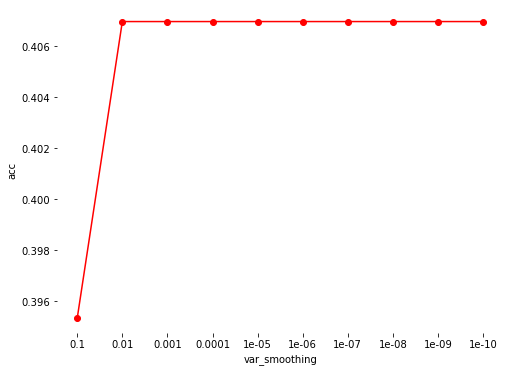

best model:  GaussianNB(var_smoothing=0.01)
best_score:  0.4069767441860465


In [34]:
paramGrid = ParameterGrid({
    'var_smoothing':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10],
})
print('Gaussian NaiveBayes')
best_model, best_score, all_models, all_scores = pf.bestFit(GaussianNB, paramGrid,
                                                          X_train, Y_train, X_test, Y_test,
                                                           metric=accuracy_score, scoreLabel='acc')

print('best model: ',best_model)
print('best_score: ', best_score)

# Evaluasi Model

### Decision Tree Classifier

WIN
               precision    recall  f1-score   support

           0       0.54      0.47      0.50        43
           1       0.53      0.60      0.57        43

    accuracy                           0.53        86
   macro avg       0.54      0.53      0.53        86
weighted avg       0.54      0.53      0.53        86



,Y True,Y pred
0,1,1
1,0,1
2,0,1
3,1,1
4,1,1
...,...,...
81,0,0
82,0,0
83,1,1
84,1,1


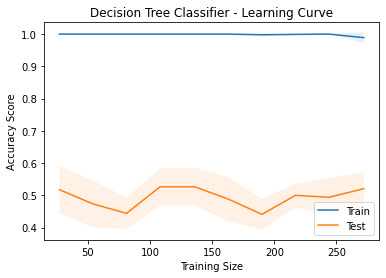

In [35]:
#Rekomendasi


decission_tree = DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=30)
decission_tree.fit(X_train, Y_train)

d = {'Y True': Y_test.to_numpy().flatten().tolist(), 'Y pred': decission_tree.predict(X_test).tolist()}
df_predict_decission_tree = pd.DataFrame(data=d)

print('WIN\n',classification_report(Y_test, decission_tree.predict(X_test)))
display(df_predict_decission_tree)

train_sizes, train_scores, test_scores = learning_curve(decission_tree,X_train, Y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,
                                                        scoring='accuracy',random_state=42)

# plot the mean training and test scores
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')

# plot the standard deviation of training and test scores
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1)
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1)

decission_tree.fit(X_train, Y_train)
# plot details
plt.title("Decision Tree Classifier - Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc='best')
plt.show()

### Gaussian Naive Bayes

WIN
               precision    recall  f1-score   support

           0       0.40      0.40      0.40        43
           1       0.41      0.42      0.41        43

    accuracy                           0.41        86
   macro avg       0.41      0.41      0.41        86
weighted avg       0.41      0.41      0.41        86



,Y1 True,Y pred
0,1,0
1,0,1
2,0,0
3,1,0
4,1,1
...,...,...
81,0,1
82,0,0
83,1,0
84,1,0


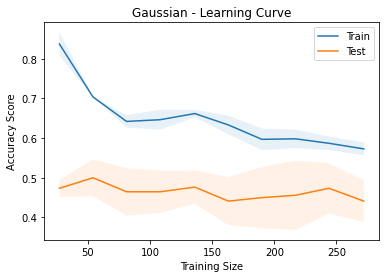

In [36]:
target_train = Y_train.astype('float').values.ravel()
target_test = Y_test.astype('float').values.ravel()

# Param from
# Parfit  :
'''
GaussianNB(var_smoothing=0.01)
best_score:  0.5116279069767442
GaussianNB(var_smoothing=0.1)
best_score:  0.46511627906976744
GaussianNB(var_smoothing=0.001)
best_score:  0.4883720930232558
best model:  GaussianNB(var_smoothing=0.01)
best_score:  0.47674418604651164
'''

gaussian = GaussianNB(var_smoothing=0.01)

# Train the model
gaussian.fit(X_train, Y_train)

# Make predictions
d = {'Y1 True': Y_test.to_numpy().flatten().tolist(), 'Y pred': gaussian.predict(X_test).tolist()}
df_predict_gaussian = pd.DataFrame(data=d)

print('WIN\n',classification_report((Y_test.to_numpy()), gaussian.predict(X_test)))
display(df_predict_gaussian)
train_sizes, train_scores, test_scores = learning_curve(gaussian,X_train, Y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,
                                                        scoring='accuracy')

# plot the mean training and test scores
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')

# plot the standard deviation of training and test scores
plt.fill_between(train_sizes, np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                 np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1)
plt.fill_between(train_sizes, np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                 np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1)

decission_tree.fit(X_train, Y_train)
# plot details
plt.title("Gaussian - Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc='best')
plt.show()

# Model Perbandingan ROC Kurva

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score,recall_score

def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(6,4)
    plt.plot([0, 1], [0, 1], color = 'gray')

def plot_sklearn_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                     display_labels=['Blue Team','Red Team'],).plot
    display(values_format='').plot
#    display.figure_.set_size_inches(6,4)

# Confussion Matrix

## Decision Tree Classifier

WIN
               precision    recall  f1-score   support

           0       0.54      0.47      0.50        43
           1       0.53      0.60      0.57        43

    accuracy                           0.53        86
   macro avg       0.54      0.53      0.53        86
weighted avg       0.54      0.53      0.53        86



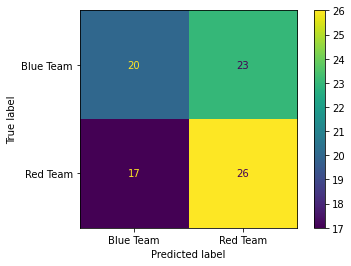

In [38]:
#plot_sklearn_roc_curve(Y1_test.to_numpy().flatten(), decission_tree.predict(X_test))
print('WIN\n',classification_report(Y_test, decission_tree.predict(X_test)))
plot_sklearn_confusion_matrix(Y_test, decission_tree.predict(X_test))

### Gaussian Naive Bayes

WIN
               precision    recall  f1-score   support

           0       0.40      0.40      0.40        43
           1       0.41      0.42      0.41        43

    accuracy                           0.41        86
   macro avg       0.41      0.41      0.41        86
weighted avg       0.41      0.41      0.41        86



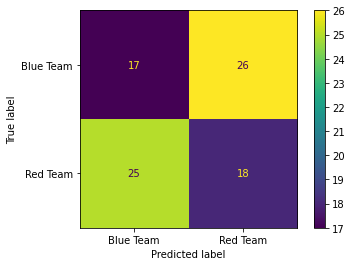

In [39]:
print('WIN\n',classification_report(Y_test, gaussian.predict(X_test)))
plot_sklearn_confusion_matrix(Y_test, gaussian.predict(X_test))

## Prediksi Probabilitas

In [40]:
decission_tree_probs = decission_tree.predict_proba(X_test)
gaussian_probs = gaussian.predict_proba(X_test)

#Simpan probabilitas untuk Hasil Positif
decission_tree_probs = decission_tree_probs[:, 1]
gaussian_probs =  gaussian_probs[:, 1]

#Menghitung nilai AUROC dan kurva ROC.
decission_tree_auc = roc_auc_score(Y_test, decission_tree_probs)
gaussian_auc = roc_auc_score(Y_test, gaussian_probs)
print('Decision Tree AUROC = %.2f' % (decission_tree_auc* 100),'%')
print('Gaussian Naive Bayes AUROC = %.2f' % (gaussian_auc* 100),'%')

Decision Tree AUROC = 53.49 %
Gaussian Naive Bayes AUROC = 38.89 %


## Ploting Kurva AU-ROC

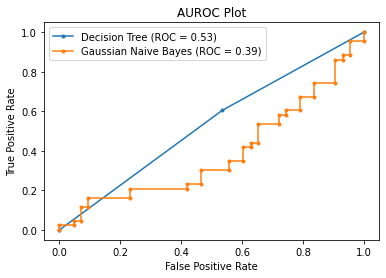

In [41]:
decission_tree_fpr, decission_tree_tpr, _ = roc_curve(Y_test, decission_tree_probs)
gaussian_fpr, gaussian_tpr, _ = roc_curve(Y_test, gaussian_probs)

#Ploting Kurva ROC
plt.plot(decission_tree_fpr, decission_tree_tpr, marker='.', label='Decision Tree (ROC = %0.2f)' % decission_tree_auc)
plt.plot(gaussian_fpr, gaussian_tpr, marker='.', label='Gaussian Naive Bayes (ROC = %0.2f)' % gaussian_auc)

# Title
plt.title('AUROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

# Input Data Mannual

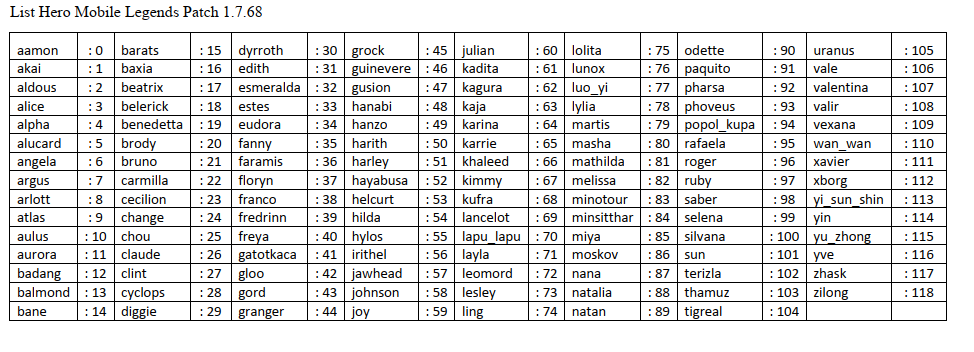

In [42]:
from IPython.display import Image
Image(filename='List Hero.png')

In [43]:
prediksi = decission_tree.predict_proba([[                                        
                                          42,39,6,26,25,
                                            72,1,111,27,29,
                                          ]]) [:,1]
# Komposisi
if prediksi[0] == 0:
    pred = "Team Red Menang"
else:
    pred = "Team Blue Menang"
print('Prediksi :\n',pred, "dengan Persentase: %.2f" %((prediksi*100)),"%")

Prediksi :
 Team Blue Menang dengan Persentase: 100.00 %
